The following is a netbook to clean and produce CSVs to utilize negbench to review negation query accuracies on the cheXpert dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
# for file access across drive

In [ ]:
# https://www.kaggle.com/datasets/ashery/chexpert
# ABOVE IS THE LINK TO THE DATASET USED

# traditional loading process below
# df = pd.read_csv('train.csv')

# drive setup
drive.mount('/content/drive')

# referencing file from drive
file_path = '/content/drive/MyDrive/intro-data-science/train.csv' # used by adamya

gokul_file_path = '/content/drive/MyDrive/Research/train.csv' # used by gokul

Mounted at /content/drive


The following is a brief check for the dataset.

In [ ]:
# verify if file path is valid
df = pd.read_csv(file_path)
print(df.head())

                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   
2  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
3  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
4  CheXpert-v1.0-small/train/patient00003/study1/...    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   
2         Frontal    AP         NaN                         NaN           NaN   
3         Lateral   NaN         NaN                         NaN           NaN   
4         Frontal    AP         NaN                         NaN           NaN   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           NaN     


--- Distribution for class 'Enlarged Cardiomediastinum' ---
Enlarged Cardiomediastinum
 NaN    178575
 0.0     21638
-1.0     12403
 1.0     10798
Name: count, dtype: int64
Unique possibilities in 'Enlarged Cardiomediastinum' (3 options): [nan  0.  1. -1.]
Column 'Enlarged Cardiomediastinum': 79.93% of the entries are NaN.
Column 'Enlarged Cardiomediastinum': 20.07% of the entries are non-NaN.


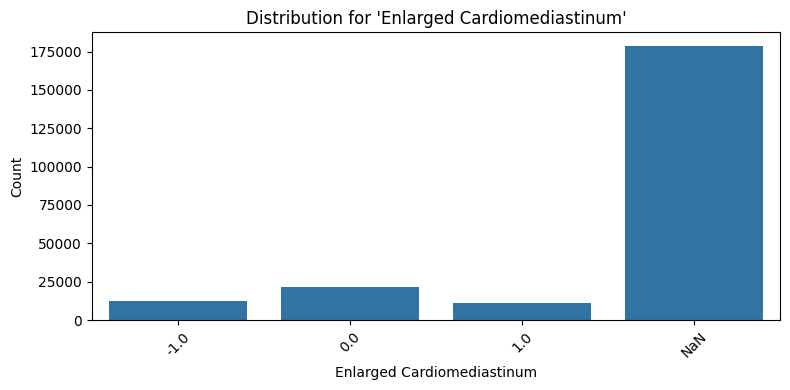


--- Distribution for class 'Cardiomegaly' ---
Cardiomegaly
 NaN    177211
 1.0     27000
 0.0     11116
-1.0      8087
Name: count, dtype: int64
Unique possibilities in 'Cardiomegaly' (3 options): [nan -1.  0.  1.]
Column 'Cardiomegaly': 79.32% of the entries are NaN.
Column 'Cardiomegaly': 20.68% of the entries are non-NaN.


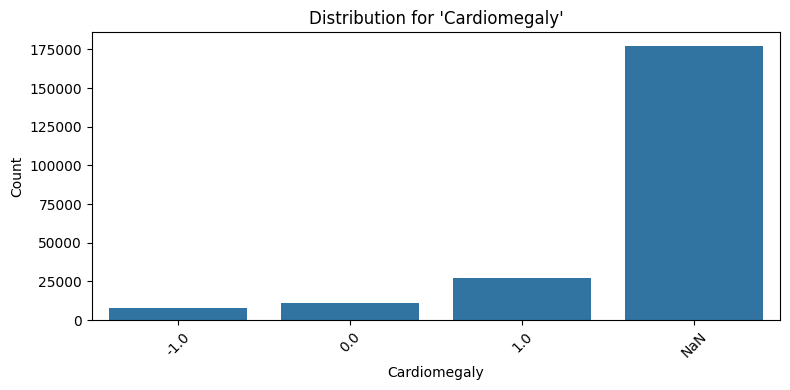


--- Distribution for class 'Lung Opacity' ---
Lung Opacity
 NaN    105636
 1.0    105581
 0.0      6599
-1.0      5598
Name: count, dtype: int64
Unique possibilities in 'Lung Opacity' (3 options): [nan  1.  0. -1.]
Column 'Lung Opacity': 47.28% of the entries are NaN.
Column 'Lung Opacity': 52.72% of the entries are non-NaN.


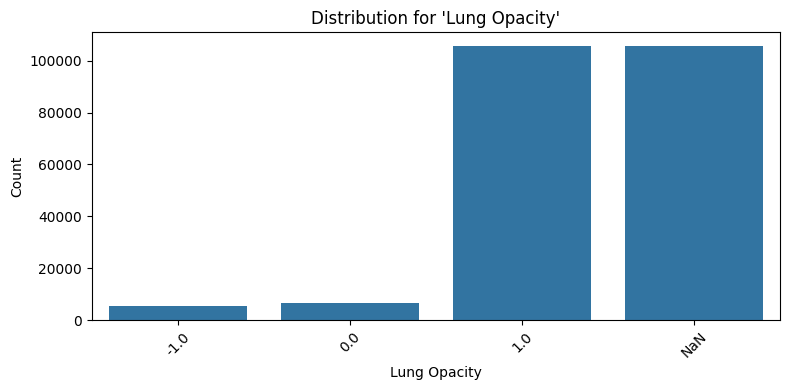


--- Distribution for class 'Lung Lesion' ---
Lung Lesion
 NaN    211470
 1.0      9186
-1.0      1488
 0.0      1270
Name: count, dtype: int64
Unique possibilities in 'Lung Lesion' (3 options): [nan  1. -1.  0.]
Column 'Lung Lesion': 94.65% of the entries are NaN.
Column 'Lung Lesion': 5.35% of the entries are non-NaN.


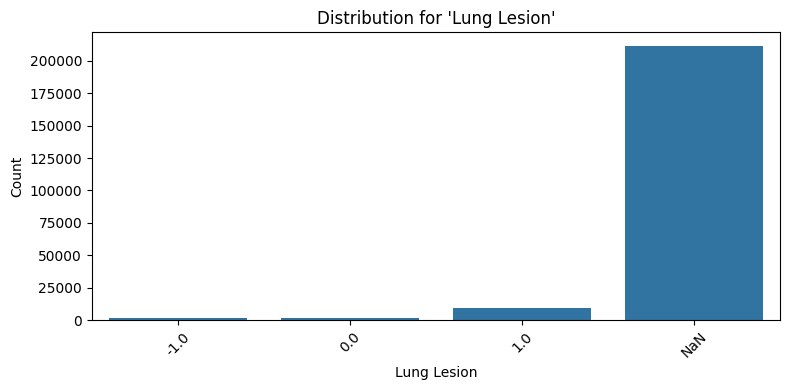


--- Distribution for class 'Edema' ---
Edema
 NaN    137458
 1.0     52246
 0.0     20726
-1.0     12984
Name: count, dtype: int64
Unique possibilities in 'Edema' (3 options): [nan -1.  1.  0.]
Column 'Edema': 61.53% of the entries are NaN.
Column 'Edema': 38.47% of the entries are non-NaN.


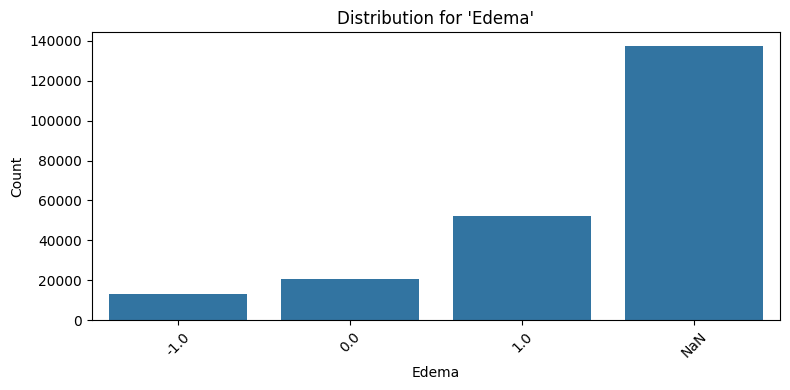


--- Distribution for class 'Consolidation' ---
Consolidation
 NaN    152792
 0.0     28097
-1.0     27742
 1.0     14783
Name: count, dtype: int64
Unique possibilities in 'Consolidation' (3 options): [nan -1.  0.  1.]
Column 'Consolidation': 68.39% of the entries are NaN.
Column 'Consolidation': 31.61% of the entries are non-NaN.


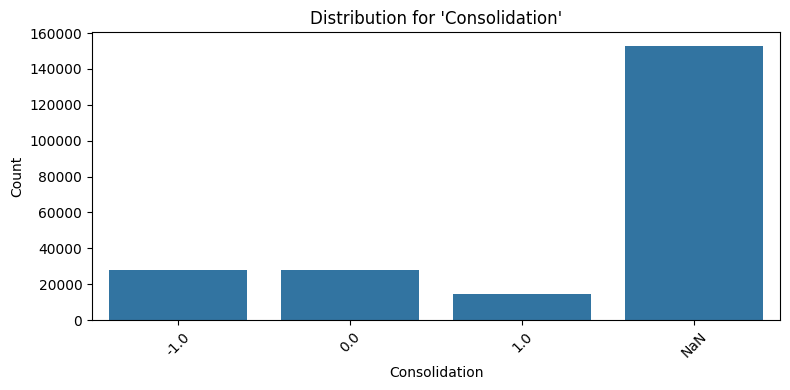


--- Distribution for class 'Pneumonia' ---
Pneumonia
 NaN    195806
-1.0     18770
 1.0      6039
 0.0      2799
Name: count, dtype: int64
Unique possibilities in 'Pneumonia' (3 options): [nan  0. -1.  1.]
Column 'Pneumonia': 87.64% of the entries are NaN.
Column 'Pneumonia': 12.36% of the entries are non-NaN.


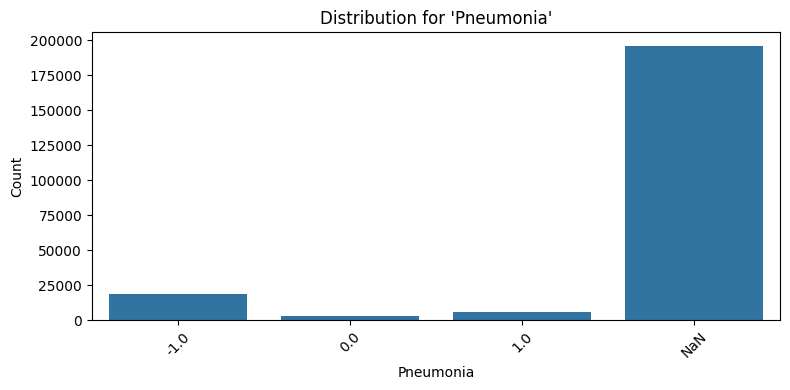


--- Distribution for class 'Atelectasis' ---
Atelectasis
 NaN    154971
-1.0     33739
 1.0     33376
 0.0      1328
Name: count, dtype: int64
Unique possibilities in 'Atelectasis' (3 options): [nan -1.  1.  0.]
Column 'Atelectasis': 69.36% of the entries are NaN.
Column 'Atelectasis': 30.64% of the entries are non-NaN.


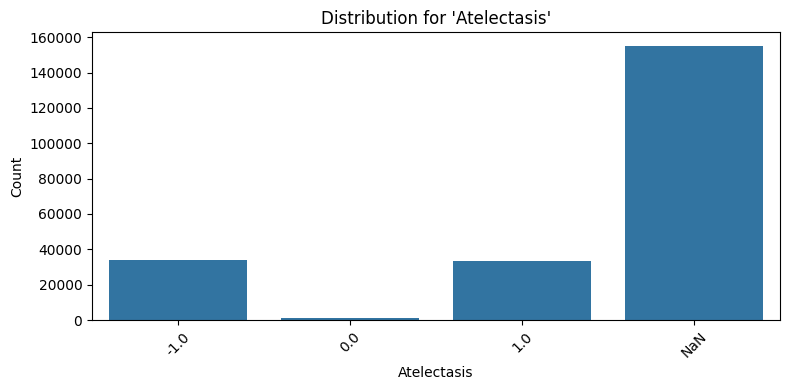


--- Distribution for class 'Pneumothorax' ---
Pneumothorax
 NaN    144480
 0.0     56341
 1.0     19448
-1.0      3145
Name: count, dtype: int64
Unique possibilities in 'Pneumothorax' (3 options): [ 0. nan  1. -1.]
Column 'Pneumothorax': 64.67% of the entries are NaN.
Column 'Pneumothorax': 35.33% of the entries are non-NaN.


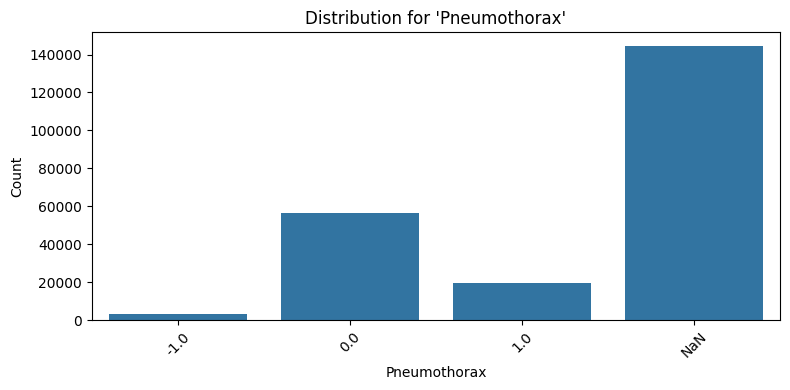


--- Distribution for class 'Pleural Effusion' ---
Pleural Effusion
 NaN    90203
 1.0    86187
 0.0    35396
-1.0    11628
Name: count, dtype: int64
Unique possibilities in 'Pleural Effusion' (3 options): [nan -1.  0.  1.]
Column 'Pleural Effusion': 40.37% of the entries are NaN.
Column 'Pleural Effusion': 59.63% of the entries are non-NaN.


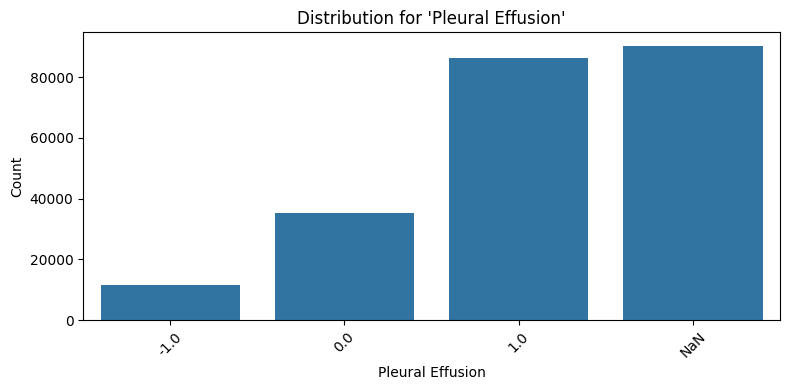


--- Distribution for class 'Pleural Other' ---
Pleural Other
 NaN    216922
 1.0      3523
-1.0      2653
 0.0       316
Name: count, dtype: int64
Unique possibilities in 'Pleural Other' (3 options): [nan  1. -1.  0.]
Column 'Pleural Other': 97.09% of the entries are NaN.
Column 'Pleural Other': 2.91% of the entries are non-NaN.


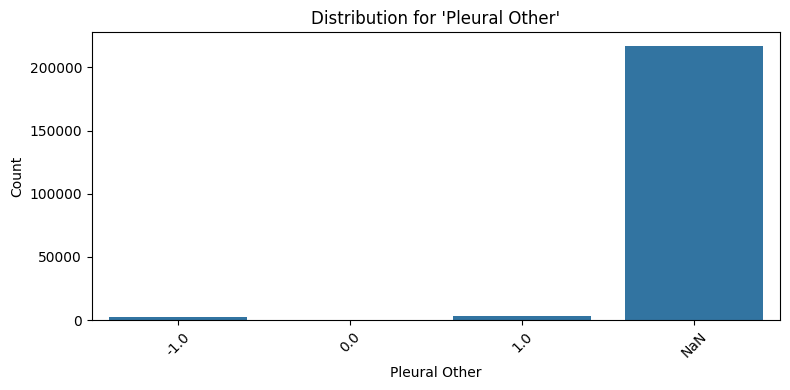


--- Distribution for class 'Fracture' ---
Fracture
 NaN    211220
 1.0      9040
 0.0      2512
-1.0       642
Name: count, dtype: int64
Unique possibilities in 'Fracture' (3 options): [nan  1.  0. -1.]
Column 'Fracture': 94.54% of the entries are NaN.
Column 'Fracture': 5.46% of the entries are non-NaN.


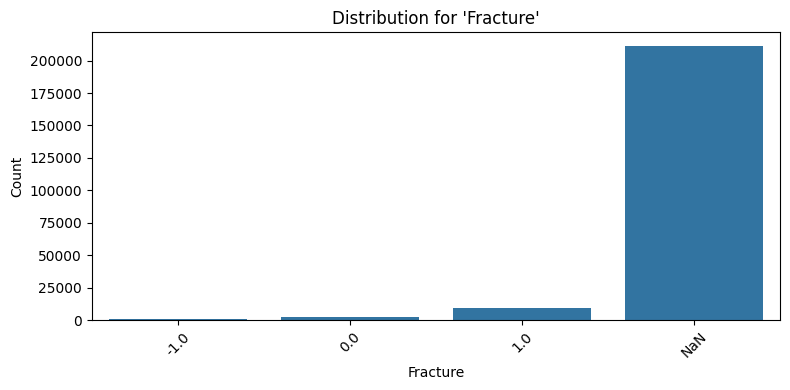


--- Distribution for class 'Support Devices' ---
Support Devices
 1.0    116001
 NaN    100197
 0.0      6137
-1.0      1079
Name: count, dtype: int64
Unique possibilities in 'Support Devices' (3 options): [ 1. nan  0. -1.]
Column 'Support Devices': 44.85% of the entries are NaN.
Column 'Support Devices': 55.15% of the entries are non-NaN.


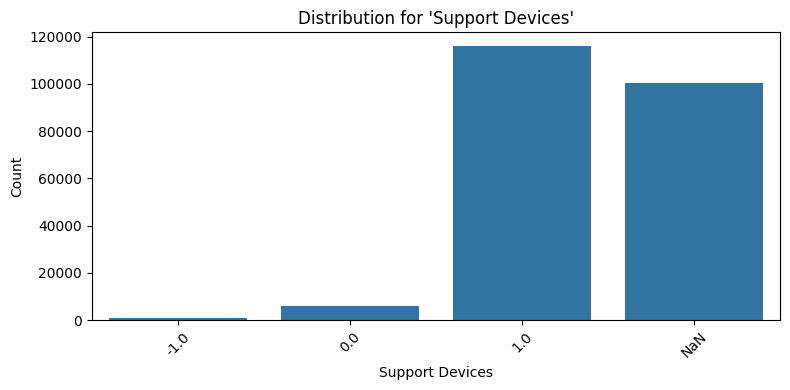

In [ ]:
# EDA Step 1:
# To view the distribution of classes and their labels
# 'Basic' data like the image path, image type (frontal/lateral) are discluded and we focus on condition classes instead

non_label_cols = ['Path', 'Follow-up', 'No Finding', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA']
label_cols = [col for col in df.columns if col not in non_label_cols]

# go through all relevant classes
for col in label_cols:
    print(f"\n--- Distribution for class '{col}' ---")

    # count each unique value (including NaN too)
    counts = df[col].value_counts(dropna=False)
    print(counts)

    # print unique probabilties and their counts
    unique_values = df[col].unique()
    n_options = df[col].nunique(dropna=True)
    print(f"Unique possibilities in '{col}' ({n_options} options): {unique_values}")

    n_nan = df[col].isna().sum()
    # get total num of column entries
    total_entries = len(df[col])
    # find nan percent
    nan_percentage = (n_nan / total_entries) * 100
    non_nan_percentage = 100 - nan_percentage
    print(f"Column '{col}': {nan_percentage:.2f}% of the entries are NaN.")
    print(f"Column '{col}': {non_nan_percentage:.2f}% of the entries are non-NaN.")

    # fill empty values with string 'NaN'
    col_data = df[col].fillna('NaN')

    # produce sorted list of unique vals
    unique_sorted = sorted(col_data.unique(), key=lambda x: str(x))

    # create bar plot for distributions
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col_data, order=unique_sorted)
    plt.title(f"Distribution for '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")

    # rotate bottom labels slightly
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

(Lung Opacity, Pleural Effusion, Support Devices)    5835
(Lung Opacity, Pneumothorax, Support Devices)        3395
(Edema, Lung Opacity, Support Devices)               2542
(Edema, Pleural Effusion, Support Devices)           1997
(Atelectasis, Consolidation, Lung Opacity)           1842
(Pleural Effusion, Pneumothorax, Support Devices)    1761
(Edema, Lung Opacity, Pleural Effusion)              1749
(Atelectasis, Pleural Effusion, Support Devices)     1488
(Atelectasis, Pneumothorax, Support Devices)         1481
(Cardiomegaly, Edema, Support Devices)               1426
Name: count, dtype: int64


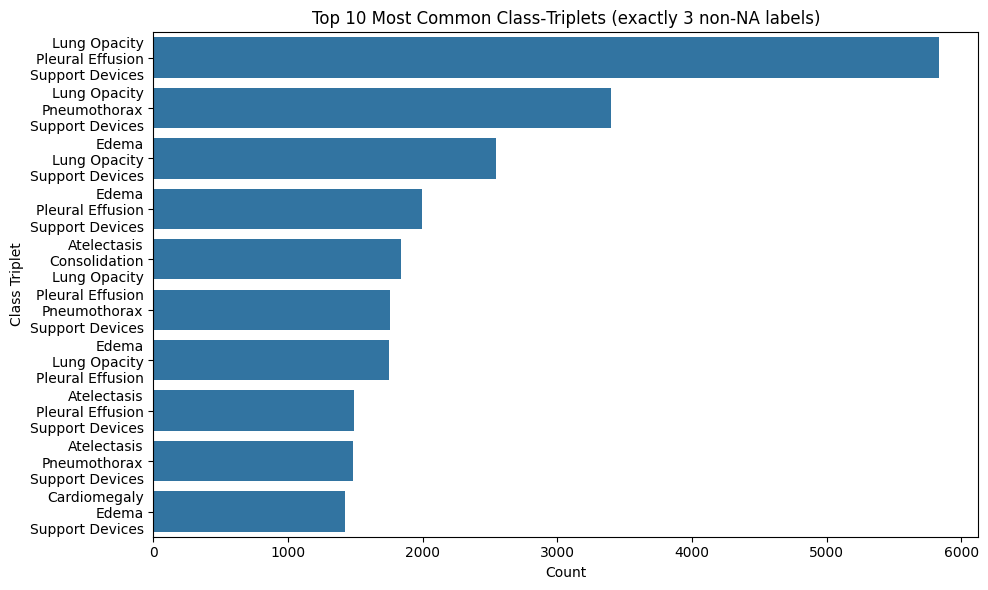

In [ ]:
# EDA Step 2:
# To view the distribution of triplet class combinations
# 'Basic' data like the image path, image type (frontal/lateral) are discluded and we focus on condition classes instead

# NOT: This includes NAN and -1 labels!

non_label_cols = ['Path', 'Follow‑up', 'No Finding', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA']
label_cols = [c for c in df.columns if c not in non_label_cols]

# filter for rows w/ three non-NaN labels
mask_three = (df[label_cols].count(axis=1) == 3)
df_three = df[mask_three]

# for each row make sorted tuple of class names which are non null
combos = df_three[label_cols].apply(
    lambda row: tuple(sorted(row.index[row.notna()])),
    axis=1
)

# get counts
combo_counts = combos.value_counts()

# get top 10 combos
top_n = 10
top_combos = combo_counts.head(top_n)

print(top_combos)

# visualize
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_combos.values,
    y=['\n'.join(c) for c in top_combos.index],  # join the 3 class‐names with newlines
    orient='h'
)
plt.title(f"Top {top_n} Most Common Class‑Triplets (exactly 3 non‑NA labels)")
plt.xlabel("Count")
plt.ylabel("Class Triplet")
plt.tight_layout()
plt.show()

(Edema, Lung Opacity, Pleural Effusion)                         9241
(Lung Opacity, Pleural Effusion, Pneumothorax)                  7618
(Atelectasis, Lung Opacity, Pleural Effusion)                   2413
(Atelectasis, Edema, Pleural Effusion)                          2346
(Cardiomegaly, Edema, Pleural Effusion)                         2098
(Cardiomegaly, Lung Opacity, Pleural Effusion)                  2085
(Cardiomegaly, Edema, Lung Opacity)                             2040
(Enlarged Cardiomediastinum, Lung Opacity, Pleural Effusion)    1676
(Consolidation, Edema, Pleural Effusion)                        1448
(Consolidation, Pleural Effusion, Pneumothorax)                 1426
Name: count, dtype: int64


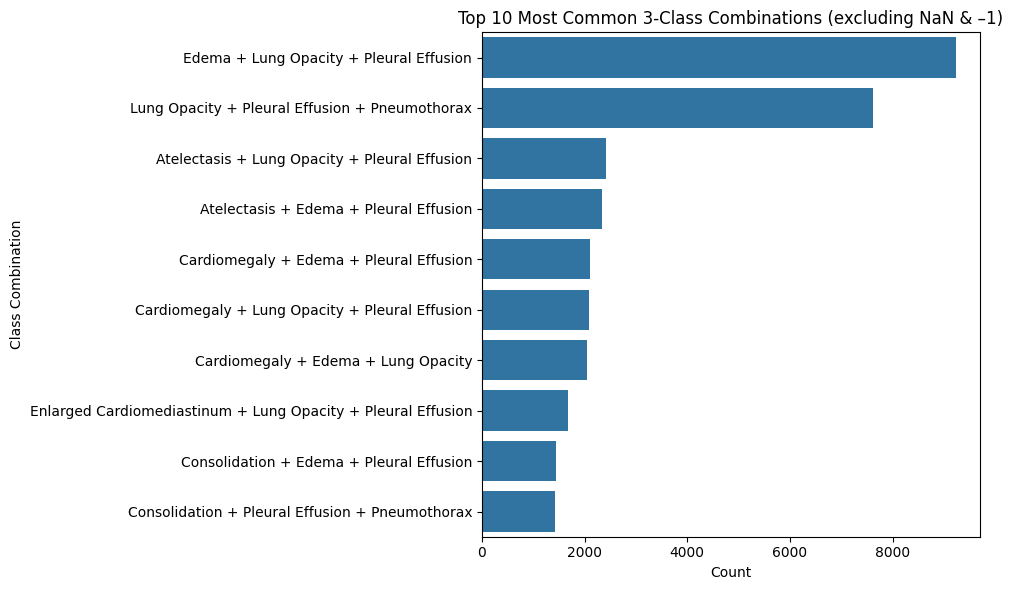

In [ ]:
# EDA Step 3:
# To view the distribution of triplet class combinations
# 'Basic' data like the image path, image type (frontal/lateral) are discluded and we focus on condition classes instead

# NOT: This EXCLUDES NAN and -1 labels!

non_label = ['Path', 'Follow‑up', 'No Finding', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'Support Devices']
label_cols = [c for c in df.columns if c not in non_label]

# include only positive and negative labels
valid_mask = df[label_cols].notna() & (df[label_cols] != -1)

# keep rows with 3 valid labels
mask_three = valid_mask.sum(axis=1) == 3
df_three = df[mask_three]

# for each row get class‐names triplet
combos = valid_mask[mask_three].apply(
    lambda row: tuple(sorted(row.index[row])),
    axis=1
)

# count frequencies
combo_counts = combos.value_counts()

# get top 10 combos
top_n = 10
top_combos = combo_counts.head(top_n)

print(top_combos)

# visualize
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_combos.values,
    y=[' + '.join(c) for c in top_combos.index],  # join class names with '+' for readability
    orient='h'
)
plt.title(f"Top {top_n} Most Common 3‑Class Combinations (excluding NaN & –1)")
plt.xlabel("Count")
plt.ylabel("Class Combination")
plt.tight_layout()
plt.show()

<ipython-input-8-99937e3d3ab0>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-8-99937e3d3ab0>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-8-99937e3d3ab0>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-8-99937e3d3ab0>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-8-99937e3d3ab0>:54: UserWarning: set_ticklabels() should only

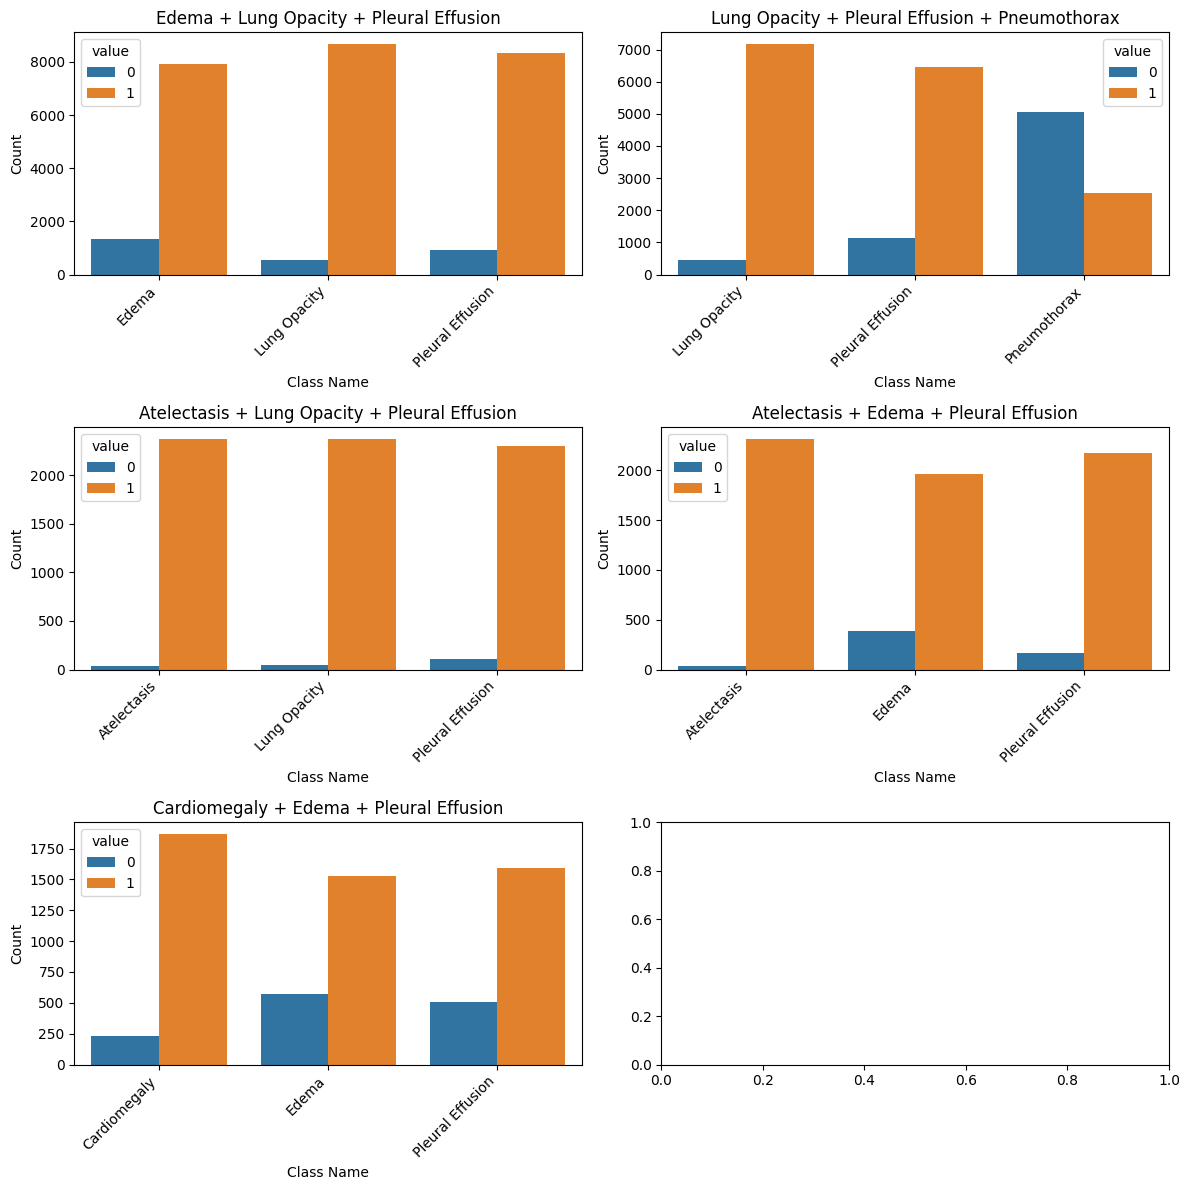

In [ ]:
# EDA Step 4:
# To view the distribution of labels across triplet class combinations
# 'Basic' data like the image path, image type (frontal/lateral) are discluded and we focus on condition classes instead

# NOT: This includes NAN and -1 labels!

# clean labels
non_label = ['Path', 'Follow‑up', 'No Finding', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'Support Devices']
label_cols = [c for c in df.columns if c not in non_label]

# get valid labels
valid_mask = df[label_cols].notna() & (df[label_cols] != -1)

# keep only rows w/ valid labels
mask_three = valid_mask.sum(axis=1) == 3
df_three = df[mask_three].copy()

# get sorted tuple of class names
combos = valid_mask[mask_three].apply(lambda row: tuple(sorted(row.index[row])), axis=1)

# count frequencies for top 5
top5 = combos.value_counts().head(5).index

# setup df for counts
records = []
for triplet in top5:
    sel_idx = combos[combos == triplet].index
    sub = df_three.loc[sel_idx, list(triplet)]
    for cls in triplet:
        vc = sub[cls].value_counts().to_dict()
        records.append({'triplet': ' + '.join(triplet), 'class': cls, 'value': 0, 'count': vc.get(0, 0)})
        records.append({'triplet': ' + '.join(triplet), 'class': cls, 'value': 1, 'count': vc.get(1, 0)})
df_counts = pd.DataFrame(records)

# visualize
n = len(top5)
cols = 2
rows = (n + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows), sharey=False)

for ax, triplet in zip(axes.flat, top5):
    grp = df_counts[df_counts['triplet'] == ' + '.join(triplet)]
    sns.barplot(
        ax=ax,
        data=grp,
        x='class',
        y='count',
        hue='value',
        dodge=True
    )
    ax.set_title(' + '.join(triplet))
    ax.set_xlabel("Class Name")
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

At this point the best candidates are:
1. Lung Opacity, Pleural Effusion, Pneumothorax - 7618 rows
2. Edema, Lung Opacity, Pleural Effusion - 9241 rows        

In [ ]:
# Data Cleaning Step 1:
# Naive approach to 1. get ~3000 rows 2. have ~20%+ of each label
# 'Basic' data like the image path, image type (frontal/lateral) are discluded and we focus on condition classes instead

# dependencies
from sklearn.model_selection import train_test_split
import numpy as np

# normal cleaning
non_label = ['Path', 'Follow‑up', 'No Finding', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'Support Devices']
label_cols = [c for c in df.columns if c not in non_label]

# only positive and negative, no NAN's and -1
valid_mask = df[label_cols].notna() & (df[label_cols] != -1)

# keep rows w/ exactly 3 valid labels
mask_three = valid_mask.sum(axis=1) == 3
df_three = df[mask_three].copy()

# triplet identificiation
triplets = valid_mask[mask_three].apply(
    lambda row: tuple(sorted(row.index[row])), axis=1
)

# find triplet combos w/ atleast 5000 rows
triplet_counts = triplets.value_counts()
big_triplets = triplet_counts[triplet_counts >= 5000].index.tolist()

samples = {}
for triplet in big_triplets:
    sub_idx = triplets[triplets == triplet].index
    sub_df  = df_three.loc[sub_idx]

    # 20%+ check
    ok = True
    for cls in triplet:
        freqs = sub_df[cls].value_counts(normalize=True)
        if freqs.get(0, 0) < 0.15 or freqs.get(1, 0) < 0.15:
            ok = False
            break
    if not ok:
        print(f"Skipping {triplet!r}: class imbalance too extreme.")
        continue

    # stratify step
    strata = sub_df[list(triplet)].apply(lambda row: tuple(row.values), axis=1)

    # sample 3000 rows w/ stratification
    n = 3000
    n = min(n, len(sub_df))
    drawn, _ = train_test_split(
        sub_df,
        train_size=n,
        stratify=strata,
        random_state=42
    )
    samples[triplet] = drawn

# verify proportions
for triplet, samp in samples.items():
    print(f"\nTriplet {triplet}: sampled {len(samp)} rows")
    for cls in triplet:
        pct = samp[cls].value_counts(normalize=True).mul(100).round(1)
        print(f"  {cls}: {pct.to_dict()}")

# df "samples" now has, for each qualifying triplet, a df of ~3000 rows

Skipping ('Edema', 'Lung Opacity', 'Pleural Effusion'): class imbalance too extreme.
Skipping ('Lung Opacity', 'Pleural Effusion', 'Pneumothorax'): class imbalance too extreme.


The naive approach to simply the dataset was not able to get ~3000 rows so more EDA is required on the triplets.

In [ ]:
# Data Cleaning Step 2.
# determine the lowest represented labels

# find triplet combos w/ atleast 5000 rows
large = triplets.value_counts()
big_triplets = large[large >= 5000].index

for triplet in big_triplets:
    sub = df_three.loc[triplets[triplets == triplet].index, list(triplet)]
    # find normalized value counts per class
    min_props = []
    for cls in triplet:
        freqs = sub[cls].value_counts(normalize=True)  # relative frequencies
        # if a class  mono-label,the following will be 0.0
        min_props.append(freqs.min())
    max_floor = min(min_props)
    print(f"{triplet!r} – max possible floor is {max_floor*100:.1f}%")


('Edema', 'Lung Opacity', 'Pleural Effusion') – max possible floor is 6.1%
('Lung Opacity', 'Pleural Effusion', 'Pneumothorax') – max possible floor is 5.8%


Now the floor, i.e. the proportion of the least common label is ~5-6% for both of the largest triplet combos we found earlier (i.e. having more than 5000+ rows).

Before trying new strategies, we first need to remove rows with all 0's or all 1's as they will not be very useful in making negation queries, as we ideally want a mixture of positive and negative objects in each image.

In [ ]:
# Data Cleaning Step 3.
# 1. remove rows w/ all positives or negatives
# 2. obtain the image paths and store for future use

top2 = big_triplets[:2]

filtered_samples = {}
for triplet in top2:
    # get the rows for this triplet, including the image Path
    idx = triplets[triplets == triplet].index
    cols = list(triplet) + ['Path']
    df_samp = df_three.loc[idx, cols].copy()

    # remove all-0 / all-1 rows (only looking at the triplet cols)
    m1 = df_samp[list(triplet)].eq(1).all(axis=1)
    m0 = df_samp[list(triplet)].eq(0).all(axis=1)
    df_filt = df_samp.loc[~(m1 | m0)].reset_index(drop=True)

    filtered_samples[triplet] = df_filt

    # report how many remain + their image paths are still retained
    print(f"Triplet {triplet}: {len(df_filt)} rows after removing all-0/all-1")
    for cls in triplet:
        props = df_filt[cls].value_counts(normalize=True).mul(100).round(1)
        print(f"   • {cls}: {props.to_dict()}%")
    print("-" * 30)



Triplet ('Edema', 'Lung Opacity', 'Pleural Effusion'): 1137 rows after removing all-0/all-1
   • Edema: {0.0: 78.4, 1.0: 21.6}%
   • Lung Opacity: {1.0: 88.6, 0.0: 11.4}%
   • Pleural Effusion: {1.0: 57.8, 0.0: 42.2}%
------------------------------
Triplet ('Lung Opacity', 'Pleural Effusion', 'Pneumothorax'): 4830 rows after removing all-0/all-1
   • Lung Opacity: {1.0: 98.6, 0.0: 1.4}%
   • Pleural Effusion: {1.0: 83.9, 0.0: 16.1}%
   • Pneumothorax: {0.0: 97.2, 1.0: 2.8}%
------------------------------


At this point there is a flip in the sense that the second triplet has quite low floors, though the first triplet has a decent floor. Now we need to see if we can clean and improve the floor of the second triplet by sampling fewer rows.

In [ ]:
# Data Cleaning Step 4.
# try to sample again to get 1. larger sample and 2. higher floor

target_n = 1500
floor = 0.10

resampled = {}

for triplet, df in filtered_samples.items():
    if len(df) > target_n:
        triplet_rows = df
        triplet_classes = list(triplet)
        n_samples = target_n

        # force‐sample a floor number from each label where needed
        sampled_indices = []
        min_samples = int(floor * n_samples)
        for cls in triplet_classes:
            vc = triplet_rows[cls].value_counts(normalize=True)
            if vc.min() < floor:
                # oversample both labels to hit  floor
                for label in [0, 1]:
                    idxs = triplet_rows[triplet_rows[cls] == label].index
                    # allow replacement in case  label is very rare
                    pick = np.random.choice(idxs, size=min_samples, replace=True)
                    sampled_indices.extend(pick)

        #  if no class was below floor,  draw a simple random sample
        if not sampled_indices:
            sampled_indices = np.random.choice(
                triplet_rows.index, size=n_samples, replace=False
            ).tolist()
        else:
            # dedupe and either trim or top up
            sampled_indices = list(dict.fromkeys(sampled_indices))  # preserve order, drop dupes
            if len(sampled_indices) < n_samples:
                remaining = n_samples - len(sampled_indices)
                # draw the rest at random (w/ replacement if needed)
                pool = triplet_rows.index.difference(sampled_indices)
                if len(pool) >= remaining:
                    extra = np.random.choice(pool, size=remaining, replace=False)
                else:
                    extra = np.random.choice(pool, size=remaining, replace=True)
                sampled_indices.extend(extra.tolist())
            else:
                sampled_indices = sampled_indices[:n_samples]

        new_df = triplet_rows.loc[sampled_indices].reset_index(drop=True)
    else:
        # if <= target_n, keep as is
        new_df = df.reset_index(drop=True)

    resampled[triplet] = new_df

# get results
for triplet, df_out in resampled.items():
    print(f"{triplet}: {len(df_out)} rows")
    for cls in triplet:
        pct = df_out[cls].value_counts(normalize=True).mul(100).round(1)
        print(f"  {cls}: {pct.to_dict()}%")
    print("-" * 40)

('Edema', 'Lung Opacity', 'Pleural Effusion'): 1137 rows
  Edema: {0.0: 78.4, 1.0: 21.6}%
  Lung Opacity: {1.0: 88.6, 0.0: 11.4}%
  Pleural Effusion: {1.0: 57.8, 0.0: 42.2}%
----------------------------------------
('Lung Opacity', 'Pleural Effusion', 'Pneumothorax'): 1500 rows
  Lung Opacity: {1.0: 95.9, 0.0: 4.1}%
  Pleural Effusion: {1.0: 81.3, 0.0: 18.7}%
  Pneumothorax: {0.0: 92.7, 1.0: 7.3}%
----------------------------------------


At this point, we can see that the ('Edema', 'Lung Opacity', 'Pleural Effusion') triplet has fewer rows than our (ideal) sampling requirement, but has decent floor's (with a floor of 10%), however, the triplet ('Lung Opacity', 'Pleural Effusion', 'Pneumothorax') has more rows (4000+) but, when sampled, has much worse floors.

For the purpose of the class assignment, the first triplet, i.e. ('Edema', 'Lung Opacity', 'Pleural Effusion') will be used as we want to continue with a proof of concept for the time being and improve as needed should we look to get published.

In [ ]:
# brief sanity check

Edema_LungOpacity_PleuralEffusion = filtered_samples[('Edema', 'Lung Opacity', 'Pleural Effusion')]
print(Edema_LungOpacity_PleuralEffusion.head())

   Edema  Lung Opacity  Pleural Effusion  \
0    0.0           1.0               1.0   
1    0.0           1.0               1.0   
2    1.0           0.0               1.0   
3    1.0           0.0               1.0   
4    1.0           1.0               0.0   

                                                Path  
0  CheXpert-v1.0-small/train/patient00047/study5/...  
1  CheXpert-v1.0-small/train/patient00114/study20...  
2  CheXpert-v1.0-small/train/patient00139/study3/...  
3  CheXpert-v1.0-small/train/patient00139/study3/...  
4  CheXpert-v1.0-small/train/patient00209/study6/...  


At this point we need to look at some examples to demonstrate how captions are made.



In [ ]:
# CSV Step 1.
# get 5 examples

# choose the correct triplet
triplet = ('Edema', 'Lung Opacity', 'Pleural Effusion')

#get the filtered_samples df for it
df_trip = filtered_samples[triplet]

# sample five random rows
sample5 = df_trip.sample(n=5, random_state=41)

# output paths + values for exactly those three classes
print("Five random examples with their class labels:\n")
for _, row in sample5.iterrows():
    print(f"Image path: {row['Path']}")
    for cls in triplet:
        print(f"    {cls}: {int(row[cls])}")
    print()

Five random examples with their class labels:

Image path: CheXpert-v1.0-small/train/patient01146/study2/view1_frontal.jpg
    Edema: 0
    Lung Opacity: 0
    Pleural Effusion: 1

Image path: CheXpert-v1.0-small/train/patient09052/study19/view1_frontal.jpg
    Edema: 0
    Lung Opacity: 1
    Pleural Effusion: 1

Image path: CheXpert-v1.0-small/train/patient27956/study6/view2_lateral.jpg
    Edema: 0
    Lung Opacity: 1
    Pleural Effusion: 0

Image path: CheXpert-v1.0-small/train/patient00047/study5/view1_frontal.jpg
    Edema: 0
    Lung Opacity: 1
    Pleural Effusion: 1

Image path: CheXpert-v1.0-small/train/patient34786/study11/view1_frontal.jpg
    Edema: 0
    Lung Opacity: 1
    Pleural Effusion: 1



In [ ]:
# NOTE -- WILL ONLY WORK AFTER YOU UNZIP CHEXPERT IMAGES (IN PHASE 2 OF NOTEBOOK)

# CSV Step 2.
# visualize 5 examples

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# 1) Base directory where your sampled images live
#    (on Colab this is /content by default)
sample_base_dir = os.path.join(os.getcwd(), 'CheXpert-v1.0-small', 'train')

# 2) Iterate over your 5 examples
for _, row in sample5.iterrows():
    # break off the last 3 parts of the original Path:
    # e.g. ".../patient00001/study1/view1_frontal.jpg"
    patient_part, study_part, view_part = row['Path'].split('/')[-3:]

    # rebuild the actual disk path
    image_path = os.path.join(
        sample_base_dir,
        patient_part,    # e.g. "patient00001"
        study_part,      # e.g. "study1"
        view_part        # e.g. "view1_frontal.jpg"
    )

    # 3) Load & display
    try:
        img = mpimg.imread(image_path)
        plt.figure(figsize=(5,5))
        plt.imshow(img, cmap='gray')
        plt.title(os.path.basename(image_path))
        plt.axis('off')
        plt.show()

        # 4) Print out labels
        print(f"Image path: {image_path}")
        for cls in triplet:
            print(f"    {cls}: {int(row[cls])}")
        print()

    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
    except Exception as e:
        print(f"Error loading {image_path}: {e}")

Error: Image not found at /content/CheXpert-v1.0-small/train/patient01146/study2/view1_frontal.jpg
Error: Image not found at /content/CheXpert-v1.0-small/train/patient09052/study19/view1_frontal.jpg
Error: Image not found at /content/CheXpert-v1.0-small/train/patient27956/study6/view2_lateral.jpg
Error: Image not found at /content/CheXpert-v1.0-small/train/patient00047/study5/view1_frontal.jpg
Error: Image not found at /content/CheXpert-v1.0-small/train/patient34786/study11/view1_frontal.jpg


At this point, we want to prepare the CSV files to use negbench, where we need one CSV file for retrieval and another for MCQ.

The following is for the retrieval CSV.

In [ ]:
# CSV Step 3
# (exhaustive positive‐only captions)

triplet = ('Edema', 'Lung Opacity', 'Pleural Effusion')
df_trip = filtered_samples[triplet]

records_array = []
for idx, row in df_trip.iterrows():
    positive = [cls for cls in triplet if row[cls] == 1]
    negative = [cls for cls in triplet if row[cls] == 0]
    image_id = idx
    path     = row['Path']

    # build some varied paraphrase templates based on how many positives we have
    caps = []
    if len(positive) == 1:
        P = positive[0]
        caps += [
            f"This image shows {P}.",
            f"{P} is clearly visible in this image.",
            f"You can see evidence of {P}.",
            f"A scan depicting {P}.",
            f"{P} appears on this X-ray."
        ]
    else:
        # two positives
        A, B = positive
        # some order variations
        caps += [
            f"This image shows {A} and {B}.",
            f"{B} and {A} are visible in this image.",
            f"You can see evidence of both {A} and {B}.",
            f"A scan depicting {A} alongside {B}.",
            f"{A} appears together with {B} on this X-ray."
        ]

    # dedupe & ensure exactly 5
    seen, final_caps = set(), []
    for c in caps:
        if c not in seen:
            seen.add(c)
            final_caps.append(c)
        if len(final_caps) == 5:
            break

    # fallback (shouldn’t happen unless you edit caps)
    while len(final_caps) < 5:
        final_caps.append(final_caps[0])

    records_array.append([
        positive,      # positive_objects
        negative,      # negative_objects (metadata)
        path,
        image_id,
        final_caps     # exactly 5 all‐positive captions
    ])

# quick check
for rec in records_array[:5]:
    print(rec)

[['Lung Opacity', 'Pleural Effusion'], ['Edema'], 'CheXpert-v1.0-small/train/patient00047/study5/view1_frontal.jpg', 0, ['This image shows Lung Opacity and Pleural Effusion.', 'Pleural Effusion and Lung Opacity are visible in this image.', 'You can see evidence of both Lung Opacity and Pleural Effusion.', 'A scan depicting Lung Opacity alongside Pleural Effusion.', 'Lung Opacity appears together with Pleural Effusion on this X-ray.']]
[['Lung Opacity', 'Pleural Effusion'], ['Edema'], 'CheXpert-v1.0-small/train/patient00114/study20/view1_frontal.jpg', 1, ['This image shows Lung Opacity and Pleural Effusion.', 'Pleural Effusion and Lung Opacity are visible in this image.', 'You can see evidence of both Lung Opacity and Pleural Effusion.', 'A scan depicting Lung Opacity alongside Pleural Effusion.', 'Lung Opacity appears together with Pleural Effusion on this X-ray.']]
[['Edema', 'Pleural Effusion'], ['Lung Opacity'], 'CheXpert-v1.0-small/train/patient00139/study3/view1_frontal.jpg', 2, [

In [ ]:
# CSV Step 4.
# produce retrieval CSV

import pandas as pd

cols = ['positive_objects', 'negative_objects', 'filepath', 'image_id', 'captions']

df_out = pd.DataFrame(records_array, columns=cols)

# write a normal CSV
df_out.to_csv('negbench_retrieval.csv', index=False)

The following is for the MCQ CSV.

In [ ]:
# CSV Step 5.
# setup mcq array

# NOTE: the following is a fork of the 'create_image_mcq_dataframe' function from
# 'create_mcq.py' from the negbench repo

# it has been repurposed to consider images with < 2 positive obbjects

import pandas as pd
import random

def create_image_mcq_dataframe_one_per_row(test_csv, output_csv):
    """
    For each row in test_csv, produce exactly one MCQ row in output_csv.
    Guarantees no rows lost or gained.
    """
    df_in = pd.read_csv(test_csv)
    mcq_data = []
    templates = ["positive", "negative", "hybrid"]

    for _, row in df_in.iterrows():
        # parse lists
        positives = eval(row['positive_objects'])
        negatives = eval(row['negative_objects'])
        filepath  = row['filepath']

        # pick one negative for this question
        N = random.choice(negatives)

        # pick two positives if possible, else duplicate
        if len(positives) >= 2:
            A, B = random.sample(positives, 2)
        else:
            A = B = positives[0]

        # choose template
        tmpl = random.choice(templates)
        if tmpl == "positive":
            correct = f"This image features {A} and {B}."
            # distractors:
            wrongs = [
                f"This image features {N} and {B}.",
                f"This image does not feature {N}.",
                f"This image features {A}, but not {B}."
            ]
        elif tmpl == "negative":
          # ground-truth ⇒ N is ABSENT,  A & B are PRESENT
          correct = f"This image does not feature {N}."          # ← only true caption

          wrongs = [                                             # every line below is FALSE
              f"This image features {N}.",                       # says N is present
              f"This image features {N} and {A}.",               # says N present + keeps A
              f"This image does not feature {A}."                # denies a true positive
          ]

        else:  # hybrid
            correct = f"This image features {B}, but not {N}."
            wrongs = [
                f"This image features {A} and {B}.",
                f"This image does not feature {A}.",
                f"This image features {N}."
            ]

        # assemble and shuffle
        choices = [correct] + wrongs
        random.shuffle(choices)
        correct_idx = choices.index(correct)

        mcq_data.append({
            'image_path': filepath,
            'correct_answer': correct_idx,
            'caption_0':   choices[0],
            'caption_1':   choices[1],
            'caption_2':   choices[2],
            'caption_3':   choices[3],
            'correct_answer_template': tmpl
        })

    df_mcq = pd.DataFrame(mcq_data, columns=[
        'image_path',
        'correct_answer',
        'caption_0','caption_1','caption_2','caption_3',
        'correct_answer_template'
    ])

    # write comma-delimited CSV, pandas will quote fields with commas
    df_mcq.to_csv(output_csv, index=False)
    print(f"Saved {len(df_mcq)} questions to {output_csv}")


In [ ]:
# CSV Step 6.
# produce the MCQ CSV

INPUT   = '/content/negbench_retrieval.csv'
OUTPUT  = '/content/negbench_mcq.csv'
create_image_mcq_dataframe_one_per_row(INPUT, OUTPUT)

import pandas as pd
pd.read_csv(OUTPUT)[:-1]


Saved 1137 questions to /content/negbench_mcq.csv


,image_path,correct_answer,caption_0,caption_1,caption_2,caption_3,correct_answer_template
0,CheXpert-v1.0-small/train/patient00047/study5/...,2,This image features Edema.,This image does not feature Lung Opacity.,This image does not feature Edema.,This image features Edema and Lung Opacity.,negative
1,CheXpert-v1.0-small/train/patient00114/study20...,1,This image features Edema and Lung Opacity.,This image does not feature Edema.,This image does not feature Lung Opacity.,This image features Edema.,negative
2,CheXpert-v1.0-small/train/patient00139/study3/...,0,This image does not feature Lung Opacity.,This image features Lung Opacity.,This image does not feature Pleural Effusion.,This image features Lung Opacity and Pleural E...,negative
3,CheXpert-v1.0-small/train/patient00139/study3/...,2,This image features Lung Opacity and Pleural E...,"This image features Edema, but not Pleural Eff...",This image features Edema and Pleural Effusion.,This image does not feature Lung Opacity.,positive
4,CheXpert-v1.0-small/train/patient00209/study6/...,0,This image features Lung Opacity and Edema.,This image features Pleural Effusion and Edema.,"This image features Lung Opacity, but not Edema.",This image does not feature Pleural Effusion.,positive
...,...,...,...,...,...,...,...
1131,CheXpert-v1.0-small/train/patient62724/study1/...,2,This image features Edema.,This image does not feature Pleural Effusion.,"This image features Lung Opacity, but not Edema.",This image features Pleural Effusion and Lung ...,hybrid
1132,CheXpert-v1.0-small/train/patient63290/study2/...,2,This image features Edema and Pleural Effusion.,This image features Edema.,This image does not feature Edema.,This image does not feature Pleural Effusion.,negative
1133,CheXpert-v1.0-small/train/patient63334/study1/...,1,This image does not feature Lung Opacity.,"This image features Pleural Effusion, but not ...",This image features Edema.,This image features Lung Opacity and Pleural E...,hybrid
1134,CheXpert-v1.0-small/train/patient63347/study1/...,2,This image does not feature Pleural Effusion.,"This image features Lung Opacity, but not Edema.",This image features Lung Opacity and Edema.,This image features Pleural Effusion and Edema.,positive


Now we see that the second triplet satisfies the min condition for the floor label of atleast 15%+ so we can continue and focus on that triplet with the classes: Lung Opacity, Pleural Effusion, Pneumothorax.

Phase 2: Negbench Model Evaluations Workflow (ported to
colab)
NOTE: We are using the Negbench repo and have produced code that also is inspired by Negbench for the purpose of evaluation.

In [ ]:
# ============================================================================
# Step 1: Prepare Colab Environment
# ============================================================================

# Clone NegBench repository
!git clone https://github.com/m1k2zoo/negbench.git
!mv negbench/benchmarks .

# Clone open_clip repository for training module
!git clone https://github.com/mlfoundations/open_clip.git
!cd open_clip && pip install -e .

# Install required dependencies
!pip install open_clip-torch torch numpy tqdm Pillow pandas wandb tensorboard

# Add the repositories to Python path
import sys
sys.path.append(os.path.abspath('benchmarks'))
sys.path.append(os.path.abspath('open_clip'))
#sys.path.append('benchmarks/src')

# Verify the files were downloaded correctly
import os
print("Checking downloaded files:")
for file in ['eval_negation.py', 'mcq.py', 'retrieval.py', 'utils.py']:
    path = os.path.join('benchmarks/src/evaluation', file)
    print(f"{file}: {'✓' if os.path.exists(path) else '✗'}")

Cloning into 'negbench'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 307 (delta 100), reused 282 (delta 84), pack-reused 0 (from 0)
Receiving objects: 100% (307/307), 29.42 MiB | 47.67 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Cloning into 'open_clip'...
remote: Enumerating objects: 3654, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 3654 (delta 72), reused 56 (delta 52), pack-reused 3543 (from 3)
Receiving objects: 100% (3654/3654), 15.39 MiB | 34.63 MiB/s, done.
Resolving deltas: 100% (2207/2207), done.
Obtaining file:///content/open_clip
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/36

In [ ]:
# (force) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Create target directory if it doesn't exist
!mkdir -p /content/CheXpert-v1.0-small

# Copy the zip file from Drive to Colab
!cp "/content/drive/MyDrive/chexpert_dataset/chexpert-v1.0-small.zip" /content/

# Unzip the file
!unzip -q /content/chexpert-v1.0-small.zip -d /content/CheXpert-v1.0-small/

# Verify the unzip was successful
!ls -l /content/CheXpert-v1.0-small/train | head -n 5

# Clean up the zip file
#!rm /content/chexpert-v1.0-small.zip

Mounted at /content/drive


In [ ]:
sys.path.append(os.path.abspath('benchmarks'))
sys.path.append(os.path.abspath('open_clip'))

In [ ]:
# ============================================================================
# Step 2: Verify Dataset Availability
# ============================================================================

import os
import pandas as pd
from PIL import Image

# Check if CSV files exist
mcq_path = 'negbench_mcq.csv'
retrieval_path = 'negbench_retrieval.csv'

print("Checking CSV files:")
print(f"MCQ CSV exists: {'✓' if os.path.exists(mcq_path) else '✗'}")
print(f"Retrieval CSV exists: {'✓' if os.path.exists(retrieval_path) else '✗'}")

# Load and inspect CSVs
print("\nInspecting MCQ CSV:")
mcq_df = pd.read_csv(mcq_path)
print(f"Number of rows: {len(mcq_df)}")
print(f"Columns: {mcq_df.columns.tolist()}")
print("\nFirst few rows:")
print(mcq_df.head())

print("\nInspecting Retrieval CSV:")
retrieval_df = pd.read_csv(retrieval_path)
print(f"Number of rows: {len(retrieval_df)}")
print(f"Columns: {retrieval_df.columns.tolist()}")
print("\nFirst few rows:")
print(retrieval_df.head())

# Verify image paths
print("\nVerifying image paths:")
# Check a sample of images from both CSVs
sample_size = 5
mcq_sample = mcq_df['image_path'].sample(n=min(sample_size, len(mcq_df)))
retrieval_sample = retrieval_df['filepath'].sample(n=min(sample_size, len(retrieval_df)))

print("\nChecking MCQ image paths:")
for path in mcq_sample:
    exists = os.path.exists(path)
    print(f"{path}: {'✓' if exists else '✗'}")
    if exists:
        try:
            img = Image.open(path)
            print(f"  Image size: {img.size}")
        except Exception as e:
            print(f"  Error opening image: {e}")

print("\nChecking Retrieval image paths:")
for path in retrieval_sample:
    exists = os.path.exists(path)
    print(f"{path}: {'✓' if exists else '✗'}")
    if exists:
        try:
            img = Image.open(path)
            print(f"  Image size: {img.size}")
        except Exception as e:
            print(f"  Error opening image: {e}")

In [ ]:
import sys
import os
print(os.path.abspath('benchmarks/src'))
sys.path.append(os.path.abspath('benchmarks/src'))

In [ ]:
!pip install braceexpand webdataset decord overrides

In [ ]:
# ============================================================================
# Step 3: Model Verification
# ============================================================================

import torch
from open_clip import create_model_and_transforms, get_tokenizer
from benchmarks.src.evaluation.mcq import evaluate_binary_mcq_model
from benchmarks.src.evaluation.retrieval import evaluate_model as evaluate_retrieval
from PIL import Image
import os, json
from torch.utils.data import DataLoader, Dataset

# ——— Model configuration —————————————————————————————————————————————
MODEL_NAME = "ViT-L-14"
DEVICE     = "cuda" if torch.cuda.is_available() else "cpu"

print(f"\nInitializing model verification:")
print(f"  Model:  {MODEL_NAME}")
print(f"  Device: {DEVICE}")

try:
    # — Load CLIP & transforms —
    model, preprocess_train, preprocess_val = create_model_and_transforms(
        MODEL_NAME,
        pretrained="openai",
        device=DEVICE,
        precision="amp"
    )
    preprocess = preprocess_val
    print("✓ Model loaded successfully")

    # grab text‐embedding dimension for fallbacks
    embed_dim = model.text_projection.shape[-1]

    # — Tokenizer —
    tokenizer = get_tokenizer(MODEL_NAME)

    # — Args container for eval functions —
    class Args:
        def __init__(self):
            self.device     = DEVICE
            self.precision  = "amp"
            self.model      = MODEL_NAME
            self.name       = "chexpert_eval"
            self.batch_size = 32

    args = Args()

    # — Prepare 5-sample test splits —
    print("\nRunning test evaluation on 5 samples:")
    test_mcq_df       = mcq_df.head(5)
    test_retrieval_df = retrieval_df.head(5)

    # — Datasets —
    class MCQDataset(Dataset):
        def __init__(self, df, preprocess_fn):
            self.df         = df
            self.preprocess = preprocess_fn
            print(f"\nMCQ Dataset Statistics:")
            print(f"  Total samples: {len(df)}")
            print("\n  Template distribution:")
            print(df['correct_answer_template'].value_counts())

        def __len__(self):
            return len(self.df)

        def __getitem__(self, idx):
            row = self.df.iloc[idx]
            img = Image.open(row['image_path']).convert('RGB')
            img = self.preprocess(img)
            caps = [row[f'caption_{i}'] for i in range(4)]

            if idx % 100 == 0:
                print(f"\nSample {idx} verification:")
                print(f"  Image path: {row['image_path']}")
                for i, c in enumerate(caps): print(f"    {i}: {c}")
                print(f"  Correct answer: {row['correct_answer']}")
                print(f"  Template type: {row['correct_answer_template']}")

            return img, caps, torch.tensor(row['correct_answer']), row['correct_answer_template']

    class RetrievalDataset(Dataset):
        def __init__(self, df, preprocess_fn):
            self.df         = df
            self.preprocess = preprocess_fn
            print(f"\nRetrieval Dataset Statistics:")
            print(f"  Total samples: {len(df)}")
            print("\n  Caption format distribution:")
            print(df['captions'].apply(type).value_counts())

        def __len__(self):
            return len(self.df)

        def __getitem__(self, idx):
            row = self.df.iloc[idx]
            img = Image.open(row['filepath']).convert('RGB')
            img = self.preprocess(img)
            caps = row['captions']

            # normalize to List[str]
            if isinstance(caps, str):
                try:
                    parsed = json.loads(caps)
                    caps = parsed if isinstance(parsed, list) else [caps]
                except json.JSONDecodeError:
                    caps = [caps]
            elif not isinstance(caps, list):
                caps = [str(caps)]
            caps = [str(c) for c in caps]

            if idx % 100 == 0:
                print(f"\nSample {idx} verification:")
                print(f"  Image path: {row['filepath']}")
                print(f"  Original caption format: {type(row['captions'])}")
                print(f"  Processed captions: {caps}")
                print(f"  Number of captions: {len(caps)}")

            return img, caps

    # — Collate functions to preserve per-sample lists —
    def mcq_collate_fn(batch):
        imgs, caps, ans, temps = zip(*batch)
        return torch.stack(imgs, dim=0), list(caps), torch.tensor(ans), list(temps)

    def retrieval_collate_fn(batch):
        imgs, caps = zip(*batch)
        return torch.stack(imgs, dim=0), list(caps)

    mcq_loader       = DataLoader(
        MCQDataset(test_mcq_df, preprocess),
        batch_size=args.batch_size,
        collate_fn=mcq_collate_fn
    )
    retrieval_loader = DataLoader(
        RetrievalDataset(test_retrieval_df, preprocess),
        batch_size=args.batch_size,
        collate_fn=retrieval_collate_fn
    )

    # ——— Binary MCQ evaluation ————————————————————————————————————————
    def evaluate_binary_mcq_model(model, dataloader, args, tokenizer):
        model.eval()
        correct = total = 0

        for images, captions_list, correct_answers, _ in dataloader:
            images = images.to(args.device)

            # per-sample text encoding
            text_features_list = []
            for captions in captions_list:
                tokens = tokenizer(captions).to(args.device)
                with torch.no_grad():
                    feats = model.encode_text(tokens)
                if feats.size(0) == 0:
                    feats = torch.zeros((len(captions), embed_dim), device=args.device)
                feats = feats / feats.norm(dim=-1, keepdim=True)
                text_features_list.append(feats)

            # now length matches batch size
            assert len(text_features_list) == images.size(0)

            text_feats = torch.stack(text_features_list)           # [B, C, D]
            with torch.no_grad():
                img_feats = model.encode_image(images)              # [B, D]
                img_feats = img_feats / img_feats.norm(dim=-1, keepdim=True)
                img_feats = img_feats.unsqueeze(1)                  # [B, 1, D]
                txt_feats = text_feats.transpose(-2, -1)            # [B, D, C]

                sim = torch.zeros(images.size(0), txt_feats.size(-1),
                                  device=args.device)
                for i in range(images.size(0)):
                    sim_i = (100.0 * torch.bmm(
                        img_feats[i:i+1],
                        txt_feats[i:i+1]
                    )).squeeze(1)
                    sim[i] = sim_i
                sim = sim.softmax(dim=-1)

            preds = sim.argmax(dim=1)
            correct += (preds == correct_answers.to(args.device)).sum().item()
            total += len(correct_answers)

        return {'total_accuracy': correct/total if total else 0}

    mcq_results = evaluate_binary_mcq_model(model,
                                            mcq_loader,
                                            args,
                                            tokenizer)
    print(f"\nMCQ Test Results: {mcq_results['total_accuracy']:.2%}")

    # ——— Retrieval evaluation ————————————————————————————————————————
    def evaluate_retrieval(model, dataloader, args, tokenizer,
                           recall_k_list=[1, 5]):
        model.eval()
        results = {}
        for images, captions_list in dataloader:
            images = images.to(args.device)

            text_features_list = []
            for captions in captions_list:
                tokens = tokenizer(captions).to(args.device)
                with torch.no_grad(): feats = model.encode_text(tokens)
                feats = feats / feats.norm(dim=-1, keepdim=True)
                text_features_list.append(feats)

            text_feats = torch.stack(text_features_list)          # [B, C, D]
            with torch.no_grad():
                img_feats = model.encode_image(images)             # [B, D]
                img_feats = img_feats / img_feats.norm(dim=-1, keepdim=True)

            sim = (100.0 * img_feats @ text_feats.transpose(-2, -1))  # [B, C]
            for k in recall_k_list:
                topk = sim.topk(k, dim=1).indices                    # [B, k]
                hits = (topk == 0).any(dim=1).float()                # [B]
                results[f'image_retrieval_recall@{k}'] = hits.mean().item()

        return results

    retrieval_results = evaluate_retrieval(model,
                                           retrieval_loader,
                                           args,
                                           tokenizer,
                                           recall_k_list=[1, 5])
    print(f"\nRetrieval Test Results:")
    print(f"  R@1: {retrieval_results['image_retrieval_recall@1']:.2%}")
    print(f"  R@5: {retrieval_results['image_retrieval_recall@5']:.2%}")

    print("\n✓ Model verification completed successfully")

except Exception as e:
    print(f"\n✗ Error during model verification: {e}")
    raise


In [ ]:
import json
import ast         # ← add this
# ADDED CHANGES ABOVE

# ============================================================================
# Step 4: Load Full Datasets
# ============================================================================

print("\nLoading full datasets for evaluation...")

try:
    # Load full datasets
    full_mcq_df = pd.read_csv('negbench_mcq.csv')
    full_retrieval_df = pd.read_csv('negbench_retrieval.csv')

    # CHANGE BELOW:
    full_retrieval_df['captions'] = full_retrieval_df['captions'].apply(ast.literal_eval)

    print(f"\nDataset sizes:")
    print(f"MCQ dataset: {len(full_mcq_df)} samples")
    print(f"Retrieval dataset: {len(full_retrieval_df)} samples")

    # Create dataloaders for full datasets
    full_mcq_dataloader = DataLoader(
        MCQDataset(full_mcq_df, preprocess),
        batch_size=args.batch_size,
        shuffle=False,
        num_workers=4
    )

    full_retrieval_dataloader = DataLoader(
        RetrievalDataset(full_retrieval_df, preprocess),
        batch_size=args.batch_size,
        shuffle=False,
        num_workers=4
    )

    # Verify a few examples
    print("\nVerifying dataset examples:")

    # Check MCQ examples
    print("\nMCQ Examples:")
    for i in range(min(3, len(full_mcq_df))):
        row = full_mcq_df.iloc[i]
        print(f"\nExample {i+1}:")
        print(f"Image path: {row['image_path']}")
        print(f"Correct answer: {row['correct_answer']}")
        print(f"Captions:")
        for j in range(4):
            print(f"  {j}: {row[f'caption_{j}']}")

    # Check Retrieval examples
    print("\nRetrieval Examples:")
    for i in range(min(3, len(full_retrieval_df))):
        row = full_retrieval_df.iloc[i]
        print(f"\nExample {i+1}:")
        print(f"Image path: {row['filepath']}")
        print(f"Captions: {row['captions']}")

    # Verify image paths
    print("\nVerifying image paths...")
    mcq_paths = full_mcq_df['image_path'].head(5)
    retrieval_paths = full_retrieval_df['filepath'].head(5)

    print("\nMCQ image paths:")
    for path in mcq_paths:
        exists = os.path.exists(path)
        print(f"{path}: {'✓' if exists else '✗'}")

    print("\nRetrieval image paths:")
    for path in retrieval_paths:
        exists = os.path.exists(path)
        print(f"{path}: {'✓' if exists else '✗'}")

    print("\n✓ Full datasets loaded successfully")

except Exception as e:
    print(f"\n✗ Error loading full datasets: {str(e)}")
    raise

In [ ]:
# ============================================================================
# Step 5: Load Model in the Notebook
# ============================================================================

print("\nLoading model for evaluation...")

try:
    # Clear any existing model from memory
    if 'model' in globals():
        del model
        torch.cuda.empty_cache() if torch.cuda.is_available() else None

    # Model configuration
    MODEL_NAME = "ViT-L-14"
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    PRECISION = "amp" if torch.cuda.is_available() else "fp32"

    print(f"\nModel configuration:")
    print(f"Model: {MODEL_NAME}")
    print(f"Device: {DEVICE}")
    print(f"Precision: {PRECISION}")

    # Load the model
    print("\nLoading model...")
    model, preprocess_train, preprocess_val = create_model_and_transforms(
        MODEL_NAME,
        pretrained="openai",
        device=DEVICE,
        precision=PRECISION
    )
    preprocess = preprocess_val  # Use validation preprocessing for evaluation

    # Get tokenizer
    tokenizer = get_tokenizer(MODEL_NAME)

    # Verify model state
    print("\nVerifying model state...")
    model.eval()  # Set to evaluation mode

    # Test forward pass with a small batch
    print("Testing model forward pass...")
    test_batch = next(iter(full_mcq_dataloader))

    # Move input data to the correct device
    images = test_batch[0].to(DEVICE)

    # Process text input
    # test_batch[1] is a list of tuples, each containing [correct_caption, wrong_caption]
    # We'll use the correct captions for testing
    captions = [batch[0] for batch in test_batch[1]]  # Extract correct captions
    text_tokens = tokenizer(captions).to(DEVICE)

    with torch.no_grad():
        if PRECISION == "amp":
            with torch.amp.autocast(device_type=DEVICE, dtype=torch.float16):
                _ = model(images, text_tokens)
        else:
            _ = model(images, text_tokens)

    # Print model statistics
    print("\nModel statistics:")
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total parameters: {total_params:,}")
    print(f"Model device: {next(model.parameters()).device}")

    # Update args with current configuration
    args.device = DEVICE
    args.precision = PRECISION
    args.model = MODEL_NAME
    args.name = "chexpert_eval"
    args.batch_size = 32  # Adjust based on available memory

    print("\n✓ Model loaded and verified successfully")

except Exception as e:
    print(f"\n✗ Error loading model: {str(e)}")
    raise

In [ ]:
# ============================================================================
# Step 6 · Evaluation logic **fixed** (collate & transpose applied)
# ============================================================================

print("\nRunning full evaluation with debugging...")

# ---------- 1.  Small helper -------------------------------------------------
def _transpose_if_needed(captions_list, batch_size):
    """
    If default_collate has transposed the captions, turn them back so we have
    one caption-list per image.
    """
    if len(captions_list) == batch_size:
        return list(captions_list)
    try:
        # transpose  [n_caps x batch] -> [batch x n_caps]
        return list(map(list, zip(*captions_list)))
    except Exception:
        return list(captions_list)

# ---------- 2.  MCQ analysis -------------------------------------------------
def analyze_mcq_predictions(model, dataloader, tokenizer, device, num_samples=5):
    print("\nAnalyzing MCQ predictions…")
    model.eval()
    template_metrics = None

    # sample a few batches
    samples = [b for i, b in zip(range(num_samples), dataloader)]

    for i, batch in enumerate(samples):
        print(f"\nSample {i+1}:")
        images          = batch[0].to(device)
        captions_list   = _transpose_if_needed(batch[1], images.size(0))
        correct_answers = batch[2].to(device)
        templates       = batch[3] if len(batch) > 3 else None

        if templates is not None and template_metrics is None:
            template_metrics = {k: {'correct': 0, 'total': 0}
                                for k in ['positive', 'negative', 'hybrid']}

        # encode all captions in one shot
        flat_caps   = [c for caps in captions_list for c in caps]
        cap_offsets = [idx for idx, caps in enumerate(captions_list) for _ in caps]

        tokens = tokenizer(flat_caps).to(device)
        with torch.no_grad():
            text_features = model.encode_text(tokens).float()
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)

        # bucket back per-image
        per_img_tf = [[] for _ in range(images.size(0))]
        for tf, idx in zip(text_features.split(1), cap_offsets):
            per_img_tf[idx].append(tf.squeeze(0))
        per_img_tf = [torch.stack(lst) for lst in per_img_tf]

        # image features
        with torch.no_grad():
            img_features = model.encode_image(images)
        img_features = img_features / img_features.norm(dim=-1, keepdim=True)

        # similarity + preds
        sims = [(100 * img @ txt.T).softmax(-1)
                for img, txt in zip(img_features, per_img_tf)]
        preds = torch.tensor([s.argmax().item() for s in sims], device=device)
        similarity = torch.nn.utils.rnn.pad_sequence(sims, batch_first=True)

        print(f"Batch size: {images.size(0)}  |  similarity: {similarity.shape}")
        for j in range(min(3, images.size(0))):
            ok = preds[j] == correct_answers[j]
            print(f"Item {j+1} pred={preds[j].item()} gold={correct_answers[j].item()} OK={bool(ok)}")

        if templates is not None:
            for tpl, pred, gold in zip(templates, preds, correct_answers):
                template_metrics[tpl]['total'] += 1
                if pred == gold:
                    template_metrics[tpl]['correct'] += 1

    if template_metrics:
        print("\nTemplate-wise accuracy:")
        for tpl, m in template_metrics.items():
            acc = m['correct'] / m['total'] if m['total'] else 0
            print(f"{tpl:8}: {acc:.2%} ({m['correct']}/{m['total']})")

# ---------- 3.  Retrieval analysis ------------------------------------------
def analyze_retrieval_predictions(model, dataloader, tokenizer, device, num_samples=5):
    print("\nAnalyzing retrieval predictions…")
    model.eval()
    samples = [b for i, b in zip(range(num_samples), dataloader)]

    for i, batch in enumerate(samples):
        print(f"\nSample {i+1}:")
        images        = batch[0].to(device)
        captions_list = _transpose_if_needed(batch[1], images.size(0))

        flat_caps   = [c for caps in captions_list for c in caps]
        cap_offsets = [idx for idx, caps in enumerate(captions_list) for _ in caps]

        tokens = tokenizer(flat_caps).to(device)
        with torch.no_grad():
            text_features = model.encode_text(tokens).float()
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)

        per_img_tf = [[] for _ in range(images.size(0))]
        for tf, idx in zip(text_features.split(1), cap_offsets):
            per_img_tf[idx].append(tf.squeeze(0))

        with torch.no_grad():
            img_features = model.encode_image(images)
        img_features = img_features / img_features.norm(dim=-1, keepdim=True)

        # compute & print
        for j in range(min(3, images.size(0))):
            sims = (100 * img_features[j] @ torch.stack(per_img_tf[j]).T)
            rank = sims.argsort(descending=True)
            print(f"Item {j+1}: best-idx={rank[0].item():2d} score={sims[rank[0]].item():.2f}"
                  f" caption='{captions_list[j][rank[0]][:80]}'")

# ---------- 4.  Apply correct collate and run everything -------------------
from torch.utils.data import DataLoader

def mcq_collate_fn(batch):
    imgs, caps, ans, temps = zip(*batch)
    return torch.stack(imgs, dim=0), list(caps), torch.tensor(ans), list(temps)

def retrieval_collate_fn(batch):
    imgs, caps = zip(*batch)
    return torch.stack(imgs, dim=0), list(caps)

# re-wrap full DataLoaders
full_mcq_dataloader = DataLoader(
    full_mcq_dataloader.dataset,
    batch_size=args.batch_size,
    collate_fn=mcq_collate_fn
)
full_retrieval_dataloader = DataLoader(
    full_retrieval_dataloader.dataset,
    batch_size=args.batch_size,
    collate_fn=retrieval_collate_fn
)

try:
    print("\nRunning detailed analysis on sample data…")
    analyze_mcq_predictions(model, full_mcq_dataloader, tokenizer, DEVICE)
    analyze_retrieval_predictions(model, full_retrieval_dataloader, tokenizer, DEVICE)

    print("\nRunning MCQ evaluation…")
    mcq_results = evaluate_binary_mcq_model(model, full_mcq_dataloader, args, tokenizer)

    print("\nRunning Retrieval evaluation…")
    retrieval_results = evaluate_retrieval(
        model, full_retrieval_dataloader, args, tokenizer, recall_k_list=[1, 5, 10]
    )

    # save + print results
    from datetime import datetime, timezone
    import json, os
    results = {
        "timestamp": datetime.now(timezone.utc).isoformat(),
        "mcq_accuracy": mcq_results['total_accuracy'],
        "retrieval": {
            "R@1": retrieval_results['image_retrieval_recall@1'],
            "R@5": retrieval_results['image_retrieval_recall@5'],
            "R@10": retrieval_results['image_retrieval_recall@10'],
        },
    }
    fname = f"evaluation_results_{datetime.utcnow():%Y%m%d_%H%M%S}.json"
    with open(fname, "w") as f:
        json.dump(results, f, indent=2)
    print("\n✓ Evaluation complete — results saved to", fname)

except Exception as e:
    print("\n✗ Error during evaluation:", e)
    raise

In [ ]:
# ============================================================================
# BEGIN EDA ON MedMNIST DATASET
# ============================================================================

!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256

In [ ]:
# ============================================================================
# Install + Load MedMNIST
# ============================================================================

from medmnist import INFO
from medmnist import ChestMNIST
from torchvision import transforms
import torch

# Download + load as DataLoader
data_transform = transforms.Compose([transforms.ToTensor()])
data_flag = 'chestmnist'
info = INFO[data_flag]
DataClass = getattr(__import__('medmnist'), info['python_class'])

train = DataClass(split='train', transform=data_transform, download=True)
test = DataClass(split='test', transform=data_transform, download=True)

print(train[0])  # tuple: (image_tensor, multi-hot label)


100%|██████████| 82.8M/82.8M [00:04<00:00, 20.2MB/s]


(tensor([[[0.2392, 0.0353, 0.0510, 0.0471, 0.0471, 0.0471, 0.0510, 0.0745,
          0.1216, 0.1765, 0.2745, 0.4039, 0.4824, 0.5608, 0.6353, 0.6353,
          0.6353, 0.5608, 0.4588, 0.3804, 0.2510, 0.1569, 0.0824, 0.0510,
          0.0431, 0.0510, 0.0824, 0.0863],
         [0.2118, 0.0275, 0.0392, 0.0471, 0.0784, 0.1333, 0.1882, 0.2431,
          0.2902, 0.3255, 0.3608, 0.4549, 0.5137, 0.5686, 0.6392, 0.6353,
          0.6431, 0.5804, 0.5137, 0.4510, 0.3647, 0.3137, 0.2549, 0.1725,
          0.0941, 0.0824, 0.1137, 0.1333],
         [0.2510, 0.0902, 0.1804, 0.2314, 0.2824, 0.3412, 0.3843, 0.4118,
          0.4118, 0.3725, 0.3412, 0.4039, 0.4941, 0.5765, 0.6510, 0.6314,
          0.6510, 0.5961, 0.5020, 0.4196, 0.3529, 0.3569, 0.3804, 0.3373,
          0.2588, 0.1765, 0.1059, 0.0588],
         [0.4314, 0.2588, 0.4157, 0.4510, 0.4706, 0.5020, 0.5098, 0.5137,
          0.3922, 0.2627, 0.2431, 0.2627, 0.3255, 0.4588, 0.6196, 0.6118,
          0.6471, 0.5255, 0.3412, 0.2706, 0.2549, 0.2510

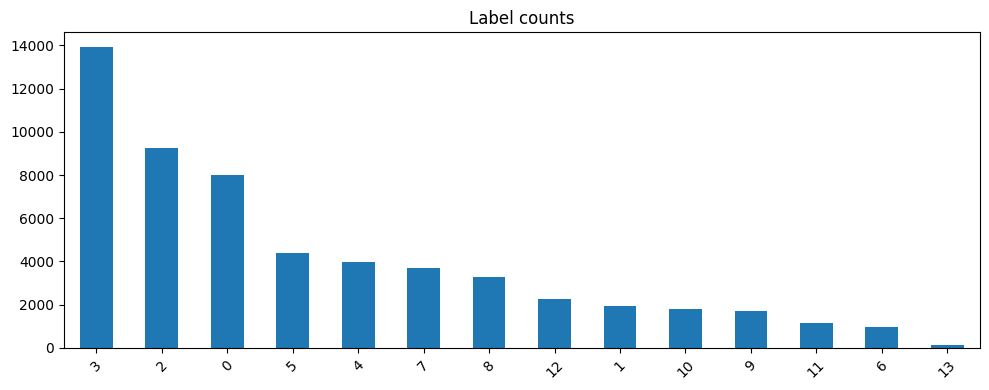

In [ ]:
# ============================================================================
# Visualize Label Counts
# ============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Convert dataset to DataFrame
labels = torch.stack([torch.tensor(y) for _, y in train])
df = pd.DataFrame(labels.numpy(), columns=info['label'])

# 1. Single-label distribution
df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,4), title='Label counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Triplet combinations
valid_triplets = []
for triplet in itertools.combinations(df.columns, 3):
    sub_df = df[list(triplet)]
    count_valid = ((sub_df == 1) | (sub_df == 0)).all(axis=1).sum()
    if count_valid >= 1000:
        # check class balance
        floors = [sub_df[c].value_counts(normalize=True).min() for c in triplet]
        if all(f >= 0.15 for f in floors):
            valid_triplets.append((triplet, count_valid, floors))

# Display
for t, n, f in valid_triplets:
    print(f"{t} → {n} samples with floors: {[round(x*100, 1) for x in f]}")


In [ ]:
# ============================================================================
# Identify all valid triplets and check their label balance
# ============================================================================

import itertools

triplet_stats = []

for triplet in itertools.combinations(df.columns, 3):
    sub_df = df[list(triplet)].copy()

    # Remove rows where all 3 labels are 1 or all are 0
    mask = ~((sub_df == 1).all(axis=1) | (sub_df == 0).all(axis=1))
    sub_df = sub_df[mask]

    if len(sub_df) < 1000:  # skip small triplets
        continue

    # Compute class floor: minimum label frequency across 0s and 1s
    floors = [sub_df[c].value_counts(normalize=True).min() for c in triplet]

    if all(f >= 0.15 for f in floors):  # keep only balanced triplets
        triplet_stats.append({
            'triplet': triplet,
            'num_samples': len(sub_df),
            'class_floors': floors
        })

# sort and print
triplet_stats = sorted(triplet_stats, key=lambda x: x['num_samples'], reverse=True)

for t in triplet_stats:
    triplet = t['triplet']
    floors = [round(f * 100, 1) for f in t['class_floors']]
    print(f"{triplet} → {t['num_samples']} samples | label floors: {floors}")


('0', '2', '3') → 23863 samples | label floors: [30.0, 35.3, 45.2]
('2', '3', '5') → 23047 samples | label floors: [39.3, 40.6, 18.1]
('2', '3', '7') → 22706 samples | label floors: [40.0, 39.5, 15.5]
('2', '3', '4') → 22675 samples | label floors: [39.8, 39.7, 16.6]
('0', '3', '5') → 22542 samples | label floors: [35.0, 38.8, 18.9]
('0', '3', '4') → 22292 samples | label floors: [35.1, 38.3, 17.1]
('0', '3', '7') → 22150 samples | label floors: [35.4, 37.9, 16.0]
('3', '5', '7') → 20043 samples | label floors: [30.9, 21.5, 18.2]
('3', '4', '7') → 19832 samples | label floors: [30.1, 19.8, 18.4]
('3', '4', '5') → 19793 samples | label floors: [30.4, 19.5, 21.4]
('3', '5', '8') → 19365 samples | label floors: [28.6, 22.2, 16.4]
('3', '7', '8') → 19206 samples | label floors: [27.8, 19.1, 16.7]
('3', '4', '8') → 19067 samples | label floors: [27.6, 20.3, 16.5]
('0', '2', '5') → 18356 samples | label floors: [42.9, 49.8, 23.2]
('0', '2', '4') → 17651 samples | label floors: [44.1, 48.8, 2

✅ Top Pick: ('0', '2', '3')
Label indices: 0 = Atelectasis, 2 = Effusion, 3 = Infiltration

Samples: 23,863

Label floors: [30.0%, 35.3%, 45.2%] — excellent balance

🔥 Bonus: same common CheXpert labels → directly portable captions and benchmarking

In [ ]:
label_dict = info['label']
for idx, name in label_dict.items():
    print(f"{idx}: {name}")

print(label_dict['0'], label_dict['2'], label_dict['3'])

0: atelectasis
1: cardiomegaly
2: effusion
3: infiltration
4: mass
5: nodule
6: pneumonia
7: pneumothorax
8: consolidation
9: edema
10: emphysema
11: fibrosis
12: pleural
13: hernia
atelectasis effusion infiltration


In [ ]:
# Rename df columns from string numbers ('0', '1', ...) to actual class names
label_dict = info['label']
df.columns = [label_dict[str(i)] for i in range(df.shape[1])]


In [ ]:
triplet = ['atelectasis', 'effusion', 'infiltration']

# Filter + remove all-0 and all-1 rows
sub_df = df[triplet].copy()
mask = ~((sub_df == 1).all(axis=1) | (sub_df == 0).all(axis=1))
sub_df = sub_df[mask].reset_index().rename(columns={'index': 'image_id'})

# Save to CSV for caption generation
sub_df.to_csv('triplet_medmnist.csv', index=False)


In [ ]:
import pandas as pd
import random

def create_mcq_csv(input_csv, output_csv):
    df = pd.read_csv(input_csv)
    triplet = ['atelectasis', 'effusion', 'infiltration']

    rows = []
    templates = ["positive", "negative", "hybrid"]

    def safe_sample(lst, n):
        return random.sample(lst, n) if len(lst) >= n else lst * n

    for _, row in df.iterrows():
        pos = [cls for cls in triplet if row[cls] == 1]
        neg = [cls for cls in triplet if row[cls] == 0]
        image_id = row['image_id']

        if len(pos) == 0 or len(neg) == 0:
            continue

        template = random.choice(templates)

        if template == "positive":
            A, B = safe_sample(pos, 2)
            if A == B:
                continue
            correct = f"This image shows {A} and {B}."
            wrongs = [
                f"This image shows {random.choice(neg)} and {B}.",
                f"This image does not show {random.choice(neg)}.",
                f"This image shows {A}, but not {B}."
            ]

        elif template == "negative":
            N = random.choice(neg)
            A, B = safe_sample(pos, 2)
            if A == N or B == N:
                continue
            correct = f"This image does not show {N}."
            wrongs = [
                f"This image shows {N}.",
                f"This image shows {N} and {A}.",
                f"This image does not show {A}."
            ]

        else:  # hybrid
            A, N = pos[0], neg[0]
            if A == N:
                continue
            correct = f"This image shows {A}, but not {N}."
            wrongs = [
                f"This image shows {A} and {N}.",
                f"This image does not show {A}.",
                f"This image shows {random.choice([x for x in pos if x != A] or [A])}."
            ]

        captions = [correct] + wrongs
        random.shuffle(captions)
        correct_idx = captions.index(correct)

        rows.append({
            "image_id": image_id,
            "correct_answer": correct_idx,
            "caption_0": captions[0],
            "caption_1": captions[1],
            "caption_2": captions[2],
            "caption_3": captions[3],
            "correct_answer_template": template
        })

    pd.DataFrame(rows).to_csv(output_csv, index=False)
    print(f"Saved {len(rows)} MCQs to {output_csv}")


In [ ]:
create_mcq_csv("triplet_medmnist.csv", "medmnist_mcq.csv")


Saved 17512 MCQs to medmnist_mcq.csv


In [ ]:
import pandas as pd

df_mcq = pd.read_csv("medmnist_mcq.csv")
print(f"Total samples: {len(df_mcq)}")
df_mcq.head(5)



Total samples: 17512


,image_id,correct_answer,caption_0,caption_1,caption_2,caption_3,correct_answer_template
0,6,0,This image does not show effusion.,This image shows effusion and infiltration.,This image shows effusion.,This image does not show infiltration.,negative
1,8,2,This image does not show effusion.,This image shows effusion and atelectasis.,"This image shows effusion, but not atelectasis.",This image shows infiltration.,hybrid
2,24,1,This image does not show atelectasis.,This image does not show effusion.,This image shows effusion.,This image shows effusion and atelectasis.,negative
3,25,1,This image does not show atelectasis.,"This image shows atelectasis, but not effusion.",This image shows atelectasis and effusion.,This image shows atelectasis.,hybrid
4,28,0,"This image shows effusion, but not atelectasis.",This image shows infiltration.,This image does not show effusion.,This image shows effusion and atelectasis.,hybrid


In [ ]:
# Template distribution
print("Template distribution:")
print(df_mcq['correct_answer_template'].value_counts())

# Answer index distribution
print("\nAnswer index distribution:")
print(df_mcq['correct_answer'].value_counts().sort_index())

Template distribution:
correct_answer_template
negative    7955
hybrid      7894
positive    1663
Name: count, dtype: int64

Answer index distribution:
correct_answer
0    4363
1    4512
2    4386
3    4251
Name: count, dtype: int64


In [ ]:
for i in range(3):
    row = df_mcq.iloc[i]
    print(f"\nImage ID: {row['image_id']}")
    print(f"Template: {row['correct_answer_template']}")
    for j in range(4):
        prefix = "✓" if j == row['correct_answer'] else "✗"
        print(f"{prefix} Option {j}: {row[f'caption_{j}']}")



Image ID: 6
Template: negative
✓ Option 0: This image does not show effusion.
✗ Option 1: This image shows effusion and infiltration.
✗ Option 2: This image shows effusion.
✗ Option 3: This image does not show infiltration.

Image ID: 8
Template: hybrid
✗ Option 0: This image does not show effusion.
✗ Option 1: This image shows effusion and atelectasis.
✓ Option 2: This image shows effusion, but not atelectasis.
✗ Option 3: This image shows infiltration.

Image ID: 24
Template: negative
✗ Option 0: This image does not show atelectasis.
✓ Option 1: This image does not show effusion.
✗ Option 2: This image shows effusion.
✗ Option 3: This image shows effusion and atelectasis.
